# Load Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns
%matplotlib inline

In [4]:
# Reading through our data
weather_data = pd.read_csv("../Week1_Assignment_2024/weather_data.csv")

weather_data.head(10)

,DateTime,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,1/1/2012 5:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,1/1/2012 6:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,1/1/2012 7:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,1/1/2012 8:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,1/1/2012 9:00,-1.3,-3.1,88,15,4.0,101.20,Fog


In [55]:
#Show last Record in the weather_dataset
weather_data.tail()

,DateTime,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [56]:
#Checking for DataTypes

weather_data.dtypes

DateTime             object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

# Data Cleaning and Overview
<hr>

In [57]:
#Check for any missing values

weather_data.isnull().sum()

DateTime            0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

The weather dataset above shows that it has no any missing values. This shows that our insights will be correct without any alterations and this is always an advantage to a data analyst because it will give him/her a good analysis when dealing with large data.

In [73]:
# Checking for any Duplicates.

duplicate_rows = weather_data[weather_data.duplicated()]

# Display the duplicate rows if any
print("Duplicate rows:")
print(duplicate_rows)

# Check if there are any duplicate rows
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")

Duplicate rows:
Empty DataFrame
Columns: [DateTime, Temp_C, Dew Point Temp_C, Rel Hum_%, Wind Speed_km/h, Visibility_km, Press_kPa, Weather]
Index: []
No duplicate rows found.


From the above code , we realize that our dataset has no duplicates. It returns a false result meaning that our records had no duplicates. When it return true, it will show that a certain rows of records has a duplicate values.

# Statistical Summery
<hr>

In [6]:
#Statistical Summery

weather_data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [10]:
#Identifying outliers
# To suppress all warnings


num_cols = weather.shade[1]
num_rows = (num_clos + 2) #3 Calucate number of rows needed
plt.figure(figsize=(12,8))

for i, col in enumerate(weather_data, i):
    if weather_data[col].dtype!='object':
        plt.subplot(num_rows, 3, 1)# 3 cols per row
        
        sns.boxplot(x=weather_data[col].orient="vertical")
        plt.title(f' Box Plot of {col}')
        plt.tight_layout()
        plt.show()


SyntaxError: invalid syntax (<ipython-input-10-53616d8a2870>, line 13)

In the above observations, We cant tell that Wind Speed and Visibility has an outliers while Rel Humidity and Pressure shows a smaller range of outliers observations.

In [60]:
# Outliers Calculations

Q1 = weather_data.quantile(0.25)
Q3 = weather_data.quantile(0.75)
IQR = Q3 - Q1

outliers = (weather_data < (Q1 - 1.5 * IQR)) | (weather_data > (Q3 + 1.5 * IQR))
print(outliers)

      DateTime  Dew Point Temp_C  Press_kPa  Rel Hum_%  Temp_C  Visibility_km  \
0        False             False      False      False   False           True   
1        False             False      False      False   False           True   
2        False             False      False      False   False           True   
3        False             False      False      False   False           True   
4        False             False      False      False   False           True   
...        ...               ...        ...        ...     ...            ...   
8779     False             False      False      False   False           True   
8780     False             False      False      False   False           True   
8781     False             False      False      False   False           True   
8782     False             False      False      False   False           True   
8783     False             False      False      False   False           True   

      Weather  Wind Speed_k

# Data Visualization
<hr>

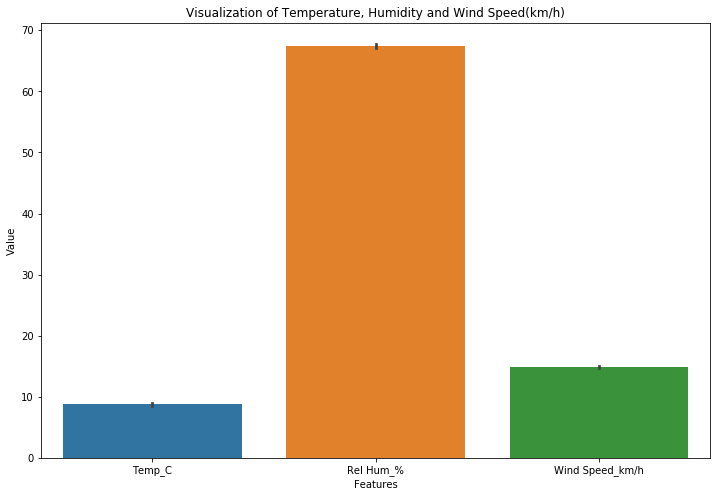

In [77]:
features_to_visualize =weather_data[['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h']]

plt.figure(figsize=(12,8))
sns.barplot(data=features_to_visualize)
plt.title('Visualization of Temperature, Humidity and Wind Speed(km/h)')
plt.ylabel('Value')
plt.xlabel('Features')
plt.show()

### Time Series Chart trends over time
<hr>

In [62]:
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose

In [41]:
!pip install plotly.express

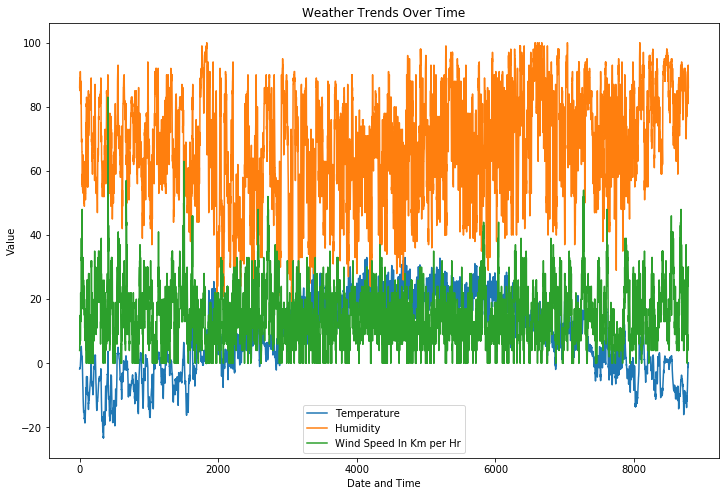

In [76]:
#Sort values by date

df = weather_data.sort_values('DateTime')

#Set the date and Time as the Index

df.set_index('DateTime', inplace=True)

# convert 'Date Time to datetime data type
weather_data['DateTime'] = pd.to_datetime(weather_data['DateTime'],  utc=True)


# Plot trends over time
plt.figure(figsize=(12, 8))
plt.plot(weather_data.index, weather_data['Temp_C'], label='Temperature')

plt.plot(weather_data.index, weather_data['Rel Hum_%'], label='Humidity')
plt.plot(weather_data.index, weather_data['Wind Speed_km/h'], label='Wind Speed In Km per Hr')



plt.title('Weather Trends Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Value')
plt.legend()
plt.show()


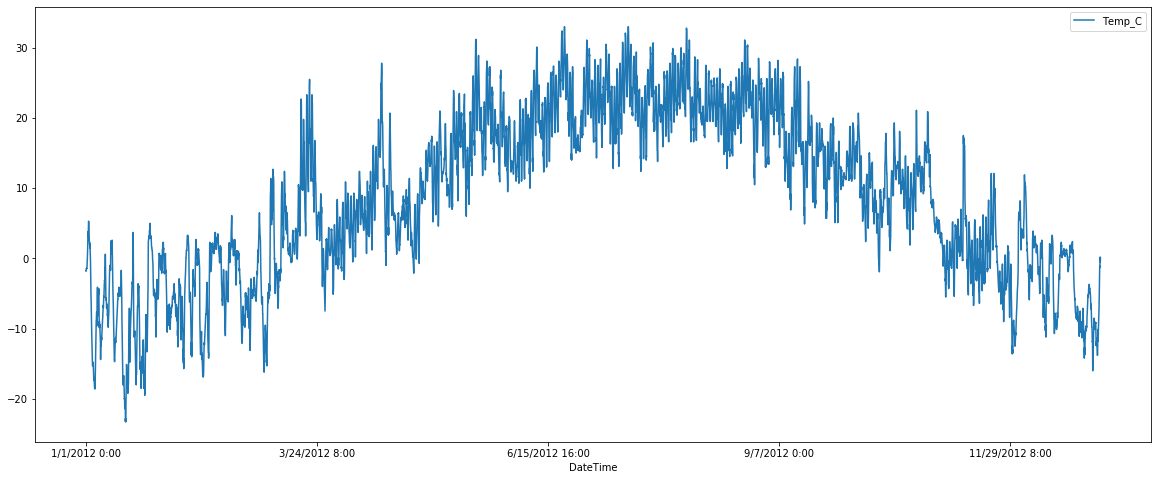

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
weather_data.set_index('DateTime').plot(y='Temp_C', ax=ax)

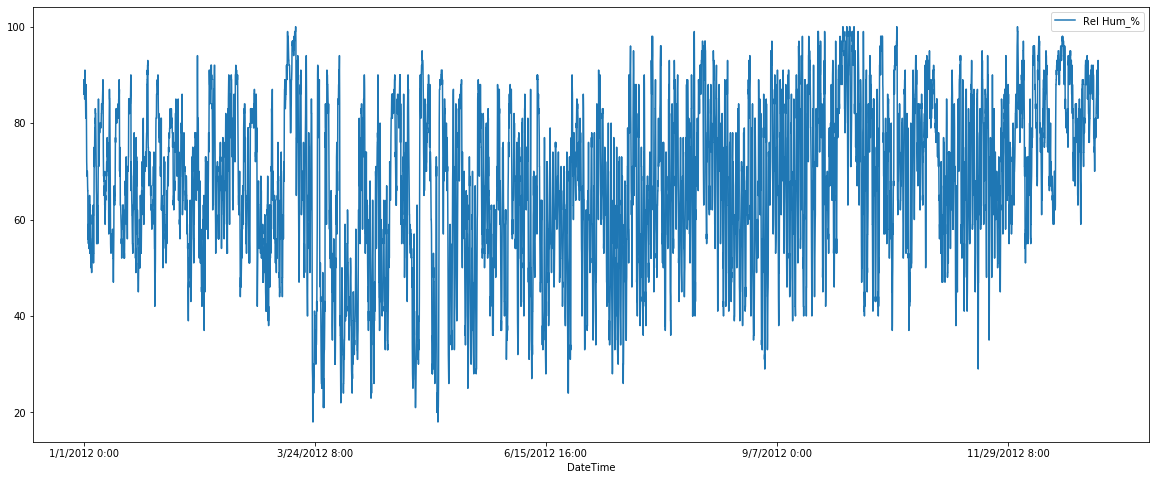

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
weather_data.set_index('DateTime').plot(y='Rel Hum_%', ax=ax)

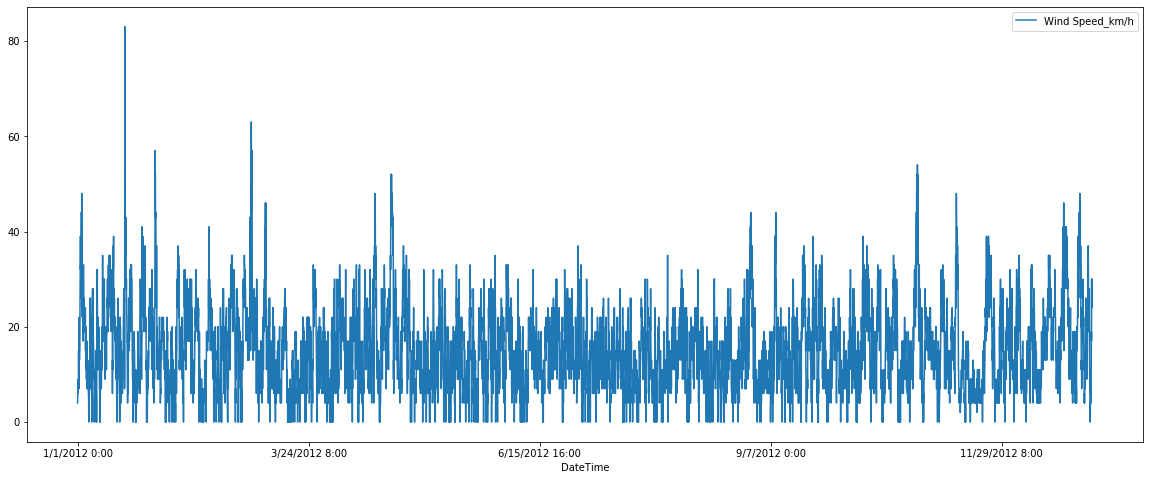

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
weather_data.set_index('DateTime').plot(y='Wind Speed_km/h', ax=ax)

## Seasonal Decompose
<hr>

<Figure size 1008x576 with 0 Axes>

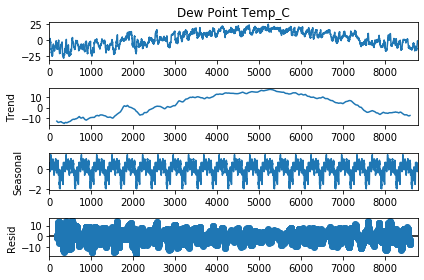

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(weather_data['Temp_C'], model='additive', period=365)


# Plot the decomposition
plt.figure(figsize=(14, 8))
decomposition.plot()
plt.show()

<Figure size 1008x576 with 0 Axes>

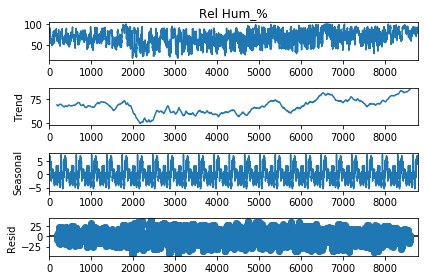

In [74]:
# Decompose the time series
decomposition = seasonal_decompose(weather_data['Rel Hum_%'], model='additive', period=365)


# Plot the decomposition
plt.figure(figsize=(14, 8))
decomposition.plot()
plt.show()

<Figure size 1008x576 with 0 Axes>

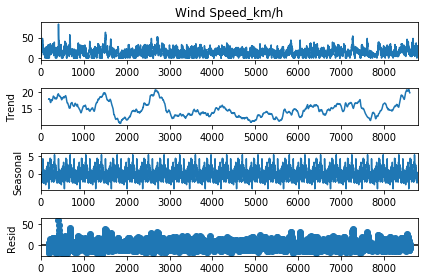

In [75]:
# Decompose the time series
decomposition = seasonal_decompose(weather_data['Wind Speed_km/h'], model='additive', period=365)


# Plot the decomposition
plt.figure(figsize=(14, 8))
decomposition.plot()
plt.show()

## Variations over months
<hr>

AttributeError: 'Index' object has no attribute 'month'

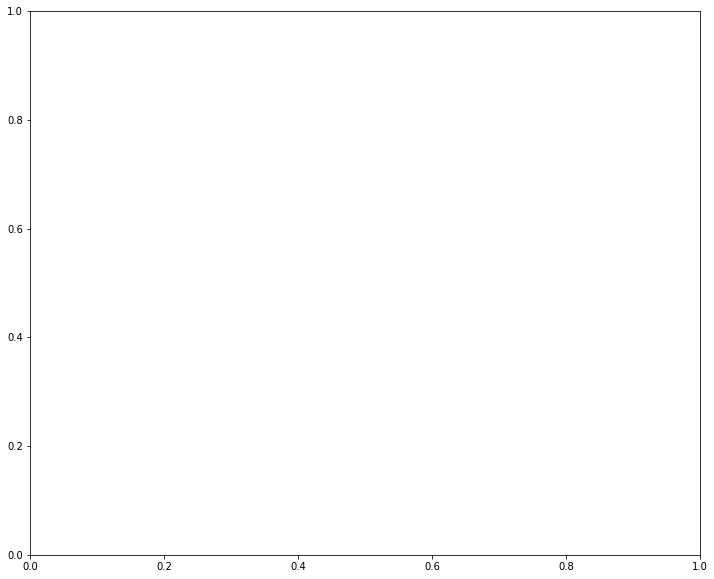

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
(weather_data.set_index('DateTime')
   .assign(month=lambda weather_data: weather_data.index.month)
   .groupby('month')['Temp_C']
   .plot(ax=ax, marker="o"))
ax.set_xlabel('Month')

### Correlation Matrices and Heatmap showing relationship between weather parameters
<hr>

                    Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Temp_C            1.000000          0.932714  -0.220182        -0.061876   
Dew Point Temp_C  0.932714          1.000000   0.139494        -0.095685   
Rel Hum_%        -0.220182          0.139494   1.000000        -0.092743   
Wind Speed_km/h  -0.061876         -0.095685  -0.092743         1.000000   
Visibility_km     0.273455          0.050813  -0.633683         0.004883   
Press_kPa        -0.236389         -0.320616  -0.231424        -0.356613   

                  Visibility_km  Press_kPa  
Temp_C                 0.273455  -0.236389  
Dew Point Temp_C       0.050813  -0.320616  
Rel Hum_%             -0.633683  -0.231424  
Wind Speed_km/h        0.004883  -0.356613  
Visibility_km          1.000000   0.231847  
Press_kPa              0.231847   1.000000  


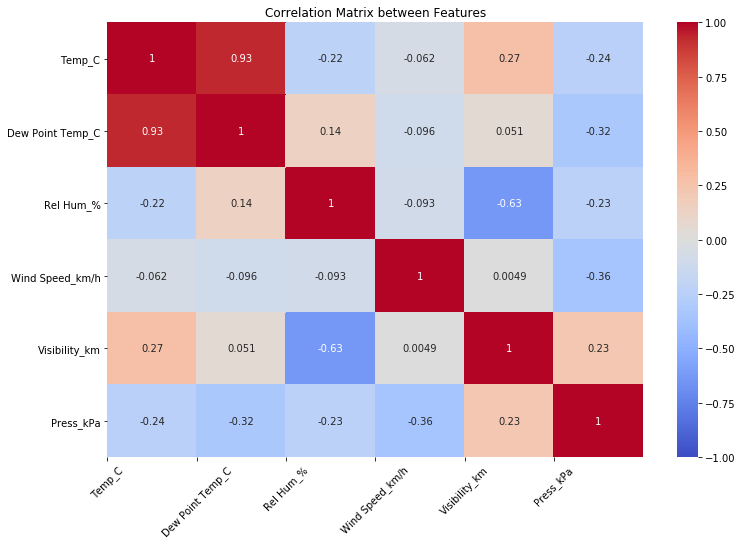

In [25]:

correlation_matrix = weather_data.corr()
print(correlation_matrix)

# Heatmap of the correlation matrix
import seaborn as sns


plt.figure(figsize=(12,8))

sns.heatmap(correlation_matrix, vmin=-1, annot=True, vmax=1, cmap='coolwarm')
plt.title('Correlation Matrix between Features')

plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)

plt.show()

## Weather Patterns and Trends
<hr>


## Insights And Conclusions
<hr>


## Recommendations and Further Analysis
<hr>